In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('New_fake_transactional_data_24.csv')

features = data[['monopoly_money_amount', 'from_totally_fake_account']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

iso_forest = IsolationForest(contamination='auto', random_state=50, n_estimators=100)

iso_forest.fit(scaled_features)

scores = iso_forest.decision_function(scaled_features)

predictions = iso_forest.predict(scaled_features)

Q1 = np.percentile(scores, 25)
Q3 = np.percentile(scores, 75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR

outliers = scores < -threshold

num_outliers = np.sum(outliers)
print(f"Number of anomalies detected: {num_outliers}")

Number of anomalies detected: 174041


In [2]:

anomaly_scores = pd.DataFrame(scores, columns=['score'])
anomaly_scores['index'] = anomaly_scores.index

sorted_scores = anomaly_scores.sort_values(by='score', ascending=True)

top_10_anomalies = sorted_scores.head(10)

last_10_anomalies = sorted_scores[sorted_scores['score'] < -threshold].tail(10)

top_10_anomalies_data = data.loc[top_10_anomalies['index']]

last_10_anomalies_data = data.loc[last_10_anomalies['index']]


print("Top 10 Anomalies:")
print(top_10_anomalies_data)

print("\nLast 10 Anomalies:")
print(last_10_anomalies_data)

Top 10 Anomalies:
         from_totally_fake_account  monopoly_money_amount  \
6034613                   100250.0                 1940.0   
2246334                   100250.0                 1975.0   
4352380                   100688.0                 1995.0   
966875                    100613.0                 1875.0   
8231914                   100645.0                 1870.0   
2406924                   100376.0                 1955.0   
1598431                   100656.0                 1890.0   
1121995                   100137.0                 1915.0   
5944627                   100338.0                 1980.0   
3521484                   100384.0                 1880.0   

        to_randomly_generated_account not_happened_yet_date  
6034613                         51590            20/09/2025  
2246334                         51590            07/04/2025  
4352380                         16948            07/07/2025  
966875                          66006            11/02/2025  


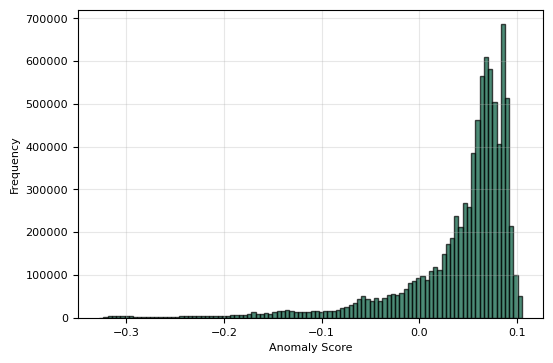

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.hist(scores, bins=100, color='#005a3c',alpha=0.7, edgecolor='black')

plt.xlabel('Anomaly Score',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.tick_params(labelsize=8)
plt.grid(True,alpha=0.3)
plt.savefig('Distribution of Anomaly Scores',dpi=300, bbox_inches='tight')
plt.show()

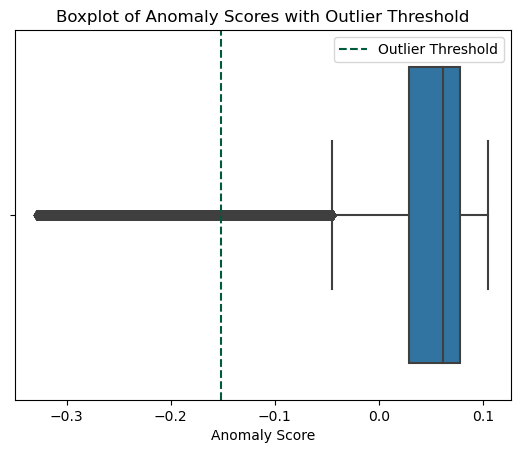

In [4]:
import seaborn as sns
sns.boxplot(x=scores)
plt.axvline(x=-threshold, color='#005a3c', linestyle='--', label='Outlier Threshold')
plt.title('Boxplot of Anomaly Scores with Outlier Threshold')
plt.xlabel('Anomaly Score')
plt.legend()
plt.show()

In [5]:
data['anomaly'] = predictions

# Filter for anomalies (where predictions are -1)
anomaly_data = data[data['anomaly'] == -1]

# Assuming 'account_id' is the column that identifies each account
# Count the number of anomalies per account
anomaly_counts = anomaly_data['from_totally_fake_account'].value_counts()

# Find the account with the highest number of anomalies
account_with_most_anomalies = anomaly_counts.idxmax()
max_anomalies = anomaly_counts.max()

print(f"Account with the most anomalies: {account_with_most_anomalies} with {max_anomalies} anomalies")

Account with the most anomalies: 2771.0 with 1870 anomalies


In [6]:
import pandas as pd

data['anomaly'] = predictions

grouped = data.groupby('from_totally_fake_account')['anomaly'].agg([min, max])

accounts_with_both = grouped[(grouped['min'] == -1) & (grouped['max'] == 1)]

print("Accounts with both normal and anomaly transactions:")
print(accounts_with_both.index.tolist())

Accounts with both normal and anomaly transactions:
[3142.0, 3143.0, 3145.0, 3158.0, 3217.0, 3226.0, 3237.0, 3241.0, 3252.0, 3269.0, 3296.0, 3362.0, 3378.0, 3381.0, 3395.0, 3402.0, 3417.0, 3431.0, 3456.0, 3458.0, 3465.0, 3472.0, 3498.0, 3512.0, 3521.0, 3559.0, 3575.0, 3577.0, 3580.0, 3582.0, 3599.0, 3602.0, 3615.0, 3634.0, 3638.0, 3642.0, 3650.0, 3675.0, 3694.0, 3704.0, 3712.0, 3765.0, 3776.0, 3786.0, 3795.0, 3800.0, 3822.0, 3838.0, 3868.0, 3880.0, 3890.0, 3896.0, 3905.0, 3907.0, 3934.0, 3939.0, 3958.0, 3970.0, 3994.0, 4009.0, 4018.0, 4021.0, 4044.0, 4047.0, 4081.0, 4083.0, 4106.0, 4107.0, 4125.0, 4141.0, 4142.0, 4148.0, 4154.0, 4171.0, 4177.0, 4206.0, 4212.0, 4230.0, 4239.0, 4265.0, 4276.0, 4279.0, 4301.0, 4305.0, 4309.0, 4313.0, 4324.0, 4336.0, 4343.0, 4386.0, 4403.0, 4416.0, 4428.0, 4463.0, 4465.0, 4490.0, 4494.0, 4497.0, 4498.0, 4511.0, 4516.0, 4518.0, 4526.0, 4548.0, 4549.0, 4555.0, 4558.0, 4559.0, 4571.0, 4572.0, 4585.0, 4614.0, 4621.0, 4623.0, 4651.0, 4655.0, 4686.0, 4690.0, 469

In [7]:
grouped = data.groupby('from_totally_fake_account')['anomaly'].agg([min, max])

accounts_with_both = grouped[(grouped['min'] == -1) & (grouped['max'] == 1)]

anomaly_counts = data[data['anomaly'] == -1].groupby('from_totally_fake_account').size()

filtered_anomaly_counts = anomaly_counts[anomaly_counts.index.isin(accounts_with_both.index)]

account_with_fewest_anomalies = filtered_anomaly_counts.idxmin()
fewest_anomalies_count = filtered_anomaly_counts.min()

print(f"Account with the fewest anomalies: {account_with_fewest_anomalies} with {fewest_anomalies_count} anomalies")

Account with the fewest anomalies: 56140.0 with 40 anomalies


C:\Users\rc940\AppData\Local\Temp\ipykernel_11860\413986085.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'])


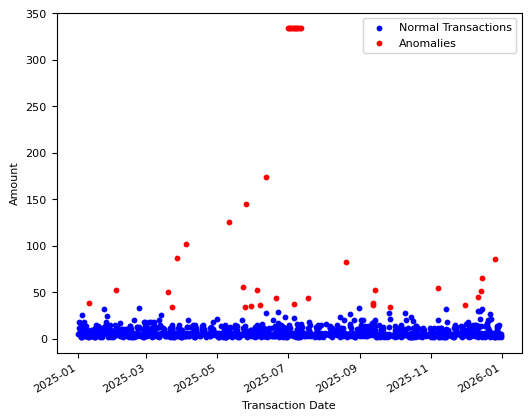

In [8]:
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'])

account_data = data[data['from_totally_fake_account'] == 56140.0]

x = account_data['not_happened_yet_date']
y = account_data['monopoly_money_amount']


normal_transactions = account_data[account_data['anomaly'] == 1]
anomaly_transactions = account_data[account_data['anomaly'] == -1]

plt.figure(figsize=(6, 5))
plt.scatter(normal_transactions['not_happened_yet_date'], normal_transactions['monopoly_money_amount'], color='blue', label='Normal Transactions',marker='o',s=10)
plt.scatter(anomaly_transactions['not_happened_yet_date'], anomaly_transactions['monopoly_money_amount'], color='red', label='Anomalies', marker='o',s=10)
plt.xlabel('Transaction Date',fontsize=8)
plt.ylabel('Amount',fontsize=8)
plt.legend(fontsize=8)
plt.tick_params(labelsize=8)
plt.gcf().autofmt_xdate()  
plt.savefig('Scatter Plot of Transaction for Account 56140',dpi=300, bbox_inches='tight')
plt.show()